In [194]:
import pandas as pd
import numpy as np
import os
import gc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plot
import seaborn as sns
from prettytable import PrettyTable

### Import the Data

In [4]:
data= pd.read_csv('/content/drive/MyDrive/EDA/aps_failure_training.csv')

### ***Data Pre-Processing***

In [5]:
data.describe()

,aa_000
count,5.910000e+03
mean,1.517600e+05
std,3.046716e+05
min,0.000000e+00
25%,1.533500e+03
50%,3.916500e+04
75%,9.605450e+04
max,2.746564e+06


In [6]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [7]:
data.shape

(5910, 171)

In [8]:
# Display the number of rows and columns
total_num_data = len(data.index)
print("Number of attributes = ", len(data.columns))
print("Number of data = ", total_num_data)


Number of attributes =  171
Number of data =  5910


In [9]:
# Display all column headers
print("----- Column Headers -----")
print(data.columns.values)

----- Column Headers -----
['class' 'aa_000' 'ab_000' 'ac_000' 'ad_000' 'ae_000' 'af_000' 'ag_000'
 'ag_001' 'ag_002' 'ag_003' 'ag_004' 'ag_005' 'ag_006' 'ag_007' 'ag_008'
 'ag_009' 'ah_000' 'ai_000' 'aj_000' 'ak_000' 'al_000' 'am_0' 'an_000'
 'ao_000' 'ap_000' 'aq_000' 'ar_000' 'as_000' 'at_000' 'au_000' 'av_000'
 'ax_000' 'ay_000' 'ay_001' 'ay_002' 'ay_003' 'ay_004' 'ay_005' 'ay_006'
 'ay_007' 'ay_008' 'ay_009' 'az_000' 'az_001' 'az_002' 'az_003' 'az_004'
 'az_005' 'az_006' 'az_007' 'az_008' 'az_009' 'ba_000' 'ba_001' 'ba_002'
 'ba_003' 'ba_004' 'ba_005' 'ba_006' 'ba_007' 'ba_008' 'ba_009' 'bb_000'
 'bc_000' 'bd_000' 'be_000' 'bf_000' 'bg_000' 'bh_000' 'bi_000' 'bj_000'
 'bk_000' 'bl_000' 'bm_000' 'bn_000' 'bo_000' 'bp_000' 'bq_000' 'br_000'
 'bs_000' 'bt_000' 'bu_000' 'bv_000' 'bx_000' 'by_000' 'bz_000' 'ca_000'
 'cb_000' 'cc_000' 'cd_000' 'ce_000' 'cf_000' 'cg_000' 'ch_000' 'ci_000'
 'cj_000' 'ck_000' 'cl_000' 'cm_000' 'cn_000' 'cn_001' 'cn_002' 'cn_003'
 'cn_004' 'cn_005' 'cn_006'

In [10]:

# Display the first n rows
print(data.head(n=5))



  class  aa_000 ab_000      ac_000 ad_000  ...  ee_007  ee_008 ee_009 ef_000 eg_000
0   neg   76698     na  2130706438    280  ...  157956   73224      0      0      0
1   neg   33058     na           0     na  ...   81140   97576   1500      0      0
2   neg   41040     na         228    100  ...  158022   95128    514      0      0
3   neg      12      0          70     66  ...       0       0      0      4     32
4   neg   60874     na        1368    458  ...  311560  433954   1218      0      0

[5 rows x 171 columns]


In [11]:
# Describe the statistics of the data-set
print("----- Data-Set Statistics -----")
print(data.describe(include="all"))


----- Data-Set Statistics -----
       class        aa_000 ab_000 ac_000  ... ee_008 ee_009 ef_000 eg_000
count   5910  5.910000e+03   5910   5910  ...   5910   5910   5910   5910
unique     2           NaN     13    981  ...   3679   1865     12     26
top      neg           NaN     na      0  ...      0      0      0      0
freq    4910           NaN   4591    806  ...   1451   3050   5299   5274
mean     NaN  1.517600e+05    NaN    NaN  ...    NaN    NaN    NaN    NaN
std      NaN  3.046716e+05    NaN    NaN  ...    NaN    NaN    NaN    NaN
min      NaN  0.000000e+00    NaN    NaN  ...    NaN    NaN    NaN    NaN
25%      NaN  1.533500e+03    NaN    NaN  ...    NaN    NaN    NaN    NaN
50%      NaN  3.916500e+04    NaN    NaN  ...    NaN    NaN    NaN    NaN
75%      NaN  9.605450e+04    NaN    NaN  ...    NaN    NaN    NaN    NaN
max      NaN  2.746564e+06    NaN    NaN  ...    NaN    NaN    NaN    NaN

[11 rows x 171 columns]


In [12]:
# Print number of positive classes and number of negative classes in the training data-set
print("Number of positive classes = ", sum(data['class'] == 'pos'))
print("Number of negative classes = ", sum(data['class'] == 'neg'))




Number of positive classes =  1000
Number of negative classes =  4910


### Dealing with Na values


In [13]:
data.replace('na',np.NaN, inplace=True)

In [14]:
missing_values=data.isna().sum()
print('missing_values', missing_values)

missing_values class        0
aa_000       0
ab_000    4591
ac_000     711
ad_000    1801
          ... 
ee_007      69
ee_008      69
ee_009      69
ef_000     573
eg_000     573
Length: 171, dtype: int64


In [15]:
dataframe_with_null = pd.DataFrame()
dataframe_with_null['columns'] = data.columns
dataframe_with_null['missing values count'] = np.asarray(data.isna().sum()) 

In [16]:
dataframe_with_null

,columns,missing values count
0,class,0
1,aa_000,0
2,ab_000,4591
3,ac_000,711
4,ad_000,1801
...,...,...
166,ee_007,69
167,ee_008,69
168,ee_009,69
169,ef_000,573


In [17]:
data.isna().sum()

class        0
aa_000       0
ab_000    4591
ac_000     711
ad_000    1801
          ... 
ee_007      69
ee_008      69
ee_009      69
ef_000     573
eg_000     573
Length: 171, dtype: int64

In [18]:
data=data[data.columns[data.isnull().mean() < 0.6]] # drop if more than 60% of the values arr missing for a column

### Categorial Encoding 

In [19]:
# Replace class labels with integer values (neg = 0, pos = 1) in training and test data-set
data['class'].replace({
    'neg': 0,
    'pos': 1
}, inplace=True)




In [20]:
data['class'].unique()

array([0, 1])

In [21]:
# we need to convert all the data to numeric format
data=data.apply(pd.to_numeric)

In [22]:
data.dtypes

class       int64
aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 164, dtype: object

In [23]:
for col in data.columns:
    data[col] = data[col].replace(np.NaN,data[col].mean())

In [24]:
data.isna().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 164, dtype: int64

In [25]:
columns=data.columns
data_n = data.describe()
col_to_drop=[]

In [26]:
for x in columns:
    if (data_n[x]['std'] == 0): # check if standard deviation is zero
        col_to_drop.append(x)

In [27]:
col_to_drop # the column with std deviation zero

['cd_000']

In [28]:
data.describe()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,5910.000000,5.910000e+03,5.910000e+03,5910.000000,5910.000000,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,...,5910.000000,5.910000e+03,5910.000000,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5910.000000,5.910000e+03,5910.000000,5910.000000,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5.910000e+03,5910.000000,5910.000000
mean,0.169205,1.517600e+05,3.245861e+08,601.993186,9.624629,18.175816,1.065678e+03,8.915463e+03,7.092851e+04,4.780613e+05,1.465373e+06,2.840905e+06,3.412698e+06,9.321716e+05,6.836371e+04,2.100479e+04,4.389759e+06,3.144084e+04,2.251642e+03,1.529058e+03,2.911116e+05,4.647926e+05,8.244298e+06,7.142649e+06,2.859371e+06,1.230631e+06,1.497470,6.559633e+02,2.553903e+04,1.957111e+03,2177.361276,598.183234,9.745058e+04,8.021021e+04,9.479099e+04,5.339539e+04,8.625382e+04,4.746923e+05,2.052446e+06,3.377024e+06,...,12.333644,3.631836e+06,6616.396513,793.870339,1.989394e+04,4.304110e+04,3.351105e+04,1.364616e+05,185.706971,3.334323e+03,2.608569e+04,9.160371e+03,9.028816e+04,5.148925e+04,11962.947349,1.483721e+07,4.846971e+05,1.791332e+05,30012.025482,6.701741e+06,1.148878e+06,1.555786e+06,1.603407e+04,0.662919,1.733183,1.834924e+07,2791.160534,3041.193745,1.946876e+06,1.940257e+06,1.064102e+06,4.903287e+05,1.026954e+06,1.043511e+06,8.555994e+05,6.446877e+05,2.648559e+05,1.478455e+04,0.146524,0.380364
std,0.374964,3.046716e+05,7.181922e+08,1965.748530,122.127228,255.392997,4.512880e+04,1.070108e+05,4.482834e+05,2.005305e+06,4.731871e+06,6.509384e+06,8.189998e+06,2.573734e+06,3.264040e+05,3.788615e+05,8.407417e+06,3.268935e+05,4.416857e+04,4.732923e+04,1.280525e+06,2.000858e+06,1.575132e+07,1.379568e+07,6.499127e+06,2.725822e+06,10.225419,2.223714e+04,3.566340e+05,4.837317e+04,9258.460050,2010.430450,1.358771e+06,1.646905e+06,1.331550e+06,6.015829e+05,1.094595e+06,3.415922e+06,6.623618e+06,8.583529e+06,...,31.738752,6.282085e+06,17391.671558,3417.719984,3.044759e+05,5.816203e+05,1.673525e+06,9.777811e+05,9815.097883,9.132157e+04,8.308366e+05,2.726330e+05,1.949857e+05,1.287290e+05,27372.636402,1.676587e+08,2.350944e+06,3.922905e+05,63844.875247,1.912415e+07,4.016554e+06,6.405248e+06,9.051069e+04,22.869147,27.717466,6.902095e+07,6329.916313,6698.718392,4.957295e+06,5.175708e+06,2.432343e+06,1.155651e+06,2.437269e+06,2.838865e+06,2.368243e+06,2.150717e+06,9.885467e+05,9.552245e+04,5.111739,9.124845
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,

In [29]:
data['class']

0       0
1       0
2       0
3       0
4       0
       ..
5905    1
5906    1
5907    1
5908    1
5909    1
Name: class, Length: 5910, dtype: int64

In [30]:
X = data.drop(['class'],axis=1)

y = data['class']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


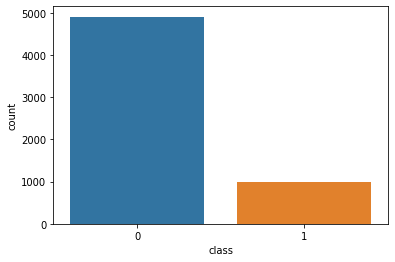

In [31]:
import seaborn as sns
sns.countplot(y)

In [32]:
from imblearn.over_sampling import SMOTE

### Sampling Method to handle imbalanced dataset

In [33]:
sample = SMOTE()

In [34]:
X_bal,y_bal = sample.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


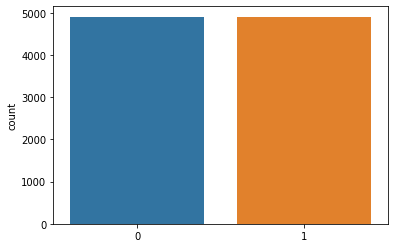

In [35]:
sns.countplot(y_bal)

### Normalized the dataset

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns,index=X.index)

In [38]:
X_scaled.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.246391,2.515028,-0.163816,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.301835,-0.216328,0.030706,0.029342,-0.130119,-0.055447,-0.218642,-0.096189,-0.050983,-0.03231,-0.227357,-0.232316,-0.210222,-0.252817,-0.168246,-0.036172,-0.146458,-0.029501,-0.071617,-0.040462,-0.125881,-0.164249,-0.071726,-0.048708,-0.071194,-0.088766,-0.078806,-0.001662,0.330242,-0.311521,-0.252805,...,1.785463e-01,0.270451,-0.108360,0.097187,-0.065344,-0.074008,-0.020026,-0.139574,-0.018922,-0.036515,-0.0314,-0.033602,-0.143644,0.267396,0.760936,-0.088504,-0.206189,0.060106,0.123998,0.420647,0.181207,-0.242913,-0.177166,-0.02899,-0.062536,-0.225285,-0.054565,-0.049147,-0.197909,-0.045089,0.072536,0.002644,-0.125524,-0.202112,-0.218089,-0.226331,-0.193869,-0.154789,-0.028667,-0.041688
1,-0.389639,-0.451987,0.000000,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.305850,-0.336099,-0.206598,-0.161432,-0.112513,-0.055447,-0.356431,-0.096189,-0.049443,-0.03231,-0.227357,-0.232316,-0.360851,-0.363586,-0.273102,-0.327300,-0.146458,-0.029501,-0.071617,-0.040462,-0.235195,-0.297565,-0.071726,-0.048708,-0.071194,-0.088766,-0.078806,-0.118040,-0.193223,-0.160798,-0.327741,...,1.119456e-16,0.000000,-0.190015,-0.079554,-0.065344,-0.074008,-0.020026,-0.139574,-0.018922,-0.036515,-0.0314,-0.033602,-0.290057,-0.112985,-0.220200,-0.088504,-0.206189,-0.193249,-0.215510,-0.114611,-0.069802,-0.242913,-0.177166,-0.02899,-0.062536,-0.215481,-0.091541,-0.105580,-0.258706,-0.215661,-0.264254,-0.270230,-0.301038,-0.281155,-0.304870,-0.262050,-0.169232,-0.139084,-0.028667,-0.041688
2,-0.363438,-0.451987,-0.255392,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.309359,-0.379532,-0.186746,-0.248390,-0.172646,-0.055447,-0.375370,-0.096189,-0.050983,-0.03231,-0.227357,-0.232316,-0.372845,-0.360217,-0.393713,-0.395119,-0.146458,-0.029501,-0.071617,-0.040462,-0.196525,-0.242846,-0.071726,-0.048708,-0.071194,-0.088766,-0.078806,-0.138976,-0.178466,-0.365525,-0.173517,...,-3.886318e-01,-0.205489,-0.294557,-0.187822,-0.065344,-0.074008,-0.020026,-0.139574,-0.018922,-0.036515,-0.0314,-0.033602,-0.391919,-0.103383,-0.139748,-0.088504,-0.206189,-0.288997,-0.305109,-0.334762,-0.274102,-0.242913,-0.177166,-0.02899,-0.062536,-0.250802,-0.280046,-0.301754,-0.339900,-0.287305,-0.323470,-0.286025,-0.247413,-0.223329,-0.225863,-0.226300,-0.171709,-0.149407,-0.028667,-0.041688
3,-0.498113,-0.451987,-0.272689,-0.078815,-0.032015,-0.023616,-0.083321,-0.158236,-0.238260,-0.309240,-0.435973,-0.416498,-0.362217,-0.209463,-0.055447,-0.521856,-0.096189,-0.050983,-0.03231,-0.226856,-0.230370,-0.522801,-0.517241,-0.438343,-0.451137,-0.146458,-0.029501,-0.071617,-0.040462,-0.228714,-0.294580,-0.071726,-0.048708,-0.071194,-0.088766,-0.078806,-0.138976,-0.309894,-0.393227,-0.338470,...,-3.886318e-01,-0.577764,-0.376097,-0.214158,-0.065344,-0.074008,-0.020026,-0.139574,-0.018922,-0.036515,-0.0314,-0.033602,-0.461899,-0.400016,-0.437077,-0.088492,-0.206031,-0.456550,-0.469835,-0.349640,-0.285606,-0.239763,-0.176680,-0.02899,-0.062536,-0.265873,-0.440814,-0.445973,-0.391619,-0.374607,-0.437419,-0.424284,-0.421366,-0.367596,-0.361307,-0.299780,-0.267947,-0.154789,0.753912,3.465518
4,-0.298333,-0.451985,-0.073257,-0.078815,-0.071174,-0.023616,-0.083321,-0.158236,-0.238418,-0.300461,-0.134323,-0.196886,-0.311063,-0.195405,-0.055447,-0.287356,-0.096189,-0.045865,-0.03231,-0.227357,-0.232316,-0.318329,-0.327940,-0.

### Dimensionality Reduction using PCA

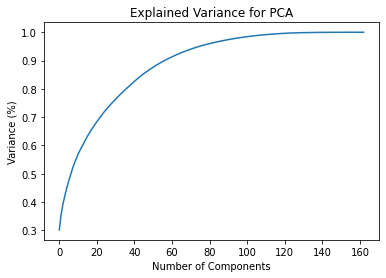

In [39]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plot.figure()
plot.plot(np.cumsum(pca.explained_variance_ratio_))
plot.xlabel('Number of Components')
plot.ylabel('Variance (%)') #for each component
plot.title('Explained Variance for PCA')
plot.show()

In [40]:
pca = PCA(n_components=100)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,index=X_scaled.index)
principal_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-1.010182,-0.730615,-0.749643,0.613667,-0.511020,-0.381277,0.172156,-0.526035,-0.315168,0.401244,-0.000514,-0.666035,0.421520,0.018028,-0.697006,0.065550,-0.332723,0.098302,-0.155768,0.050701,-0.252367,0.075140,-0.188792,-0.101590,0.390731,-0.293398,-0.129517,-0.987923,0.104586,0.088973,0.572131,-0.030748,-0.725415,0.664582,-0.662839,0.362238,-1.186192,-0.244346,0.974306,-0.299866,...,0.353723,0.175212,-0.168009,-0.566167,-0.292067,-0.211941,0.023956,-0.452089,0.497657,-0.019070,-0.181376,-0.265898,-0.715306,-0.096652,0.297585,-0.022864,0.158370,-0.054573,0.144948,-0.338151,0.062396,0.006015,-0.168570,-0.119476,0.285671,0.103682,-0.045032,-0.277403,-0.207827,0.142916,0.597182,0.257108,-0.254663,0.335292,-0.243198,0.291602,0.066080,0.233309,-0.136035,0.392541
1,-2.471281,-0.226756,0.071010,0.106098,-0.205778,-0.109652,0.081457,-0.175051,-0.076733,-0.195236,-0.068926,-0.211378,-0.060374,0.104950,-0.237540,0.172513,-0.052015,-0.118548,-0.208989,0.075619,-0.088679,0.037895,0.027940,-0.194846,0.009939,0.036035,-0.039402,-0.046250,0.104841,0.097663,-0.061932,-0.200127,0.264802,-0.052691,0.115533,-0.021104,0.196392,0.142723,-0.222668,-0.020062,...,-0.074912,0.285979,0.807222,0.151909,0.584641,-0.255705,-0.393807,0.397023,-1.021911,-0.140700,-0.026210,-0.123158,-0.288048,0.373765,0.134036,-0.188930,0.090129,0.462588,0.143467,-0.020975,-0.057168,-0.628934,-0.305996,-0.764683,-0.103306,0.964947,-0.087225,0.210992,0.081970,-0.182022,-0.113439,-0.115940,-0.025768,-0.001064,0.076700,-0.076829,-0.094602,-0.172070,0.228469,0.163599
2,-2.910558,-0.236646,0.323054,-0.271688,-0.319691,0.167476,-0.187882,-0.055073,-0.186750,0.431160,-0.253236,0.502868,0.225004,-0.126695,0.627157,0.302228,0.266917,-0.233059,-0.028591,-0.221988,0.007672,-0.054821,0.037849,-0.087443,-0.047059,0.173720,0.039005,0.136738,0.008794,-0.029569,-0.203294,-0.046593,0.074741,-0.247873,0.203308,-0.139497,0.047239,0.060280,-0.249554,0.048478,...,0.034830,0.078130,0.027894,-0.017036,0.100334,-0.007183,-0.132303,-0.100504,-0.083183,0.072473,-0.142532,-0.101658,0.000221,-0.005094,0.005166,0.067878,0.076041,0.004281,-0.086490,0.016187,0.096794,0.330502,0.112973,0.154467,0.001072,-0.130794,-0.018969,-0.104340,-0.057464,-0.107797,0.025342,0.040633,-0.048303,0.045720,-0.015549,-0.019916,-0.077846,0.007314,0.065166,0.034172
3,-3.893221,-0.032993,0.669323,-0.334443,0.115691,0.312502,-0.132716,0.300123,0.810643,-0.298217,0.705565,0.849768,0.074436,-0.214031,0.923995,0.498123,0.270458,-0.172980,-0.007143,-0.210014,0.033691,0.053478,0.115648,0.105801,-0.217914,0.457608,1.255924,-0.146556,0.439635,1.001752,-0.114804,0.240612,0.392338,-0.732475,-0.383469,-0.195126,-0.447368,-0.484080,0.608817,1.980189,...,-0.125308,-0.239409,-0.152414,0.005213,-0.006749,0.038492,-0.120420,0.066620,0.074083,0.101764,-0.186974,0.039595,-0.112225,0.072285,-0.036933,-0.044015,-0.059253,-0.103504,-0.168615,-0.019782,-0.058965,0.121961,-0.138698,-0.144312,-0.006454,-0.106660,0.053809,-0.051520,0.050209,0.051735,0.092251,0.034146,-0.059948,-0.047081,-0.011309,0.076376,0.014167,-0.102570,0.104685,0.054552
4,-2.016483,-0.153569,-0.409120,-0.027122,-0.146041,-0.016216,-0.008420,-0.356141,-0.303330,0.463904,-0.191395,-0.669385,-0.313938,0.017941,-0.549518,-0.467600,-0.220416,0.079517,0.011412,0.210817,-0.054081,0.044966,-0.015199,-0.003061,-0.201688,0.155243,0.010248,0.278330,0.139196,-0.017920,-0.346804,-0.042036,0.112982,-0.186889,0.205278,-0.169031,0.063537,0.146240,-0.325326,-0.009581,...,-0.062050,-0.109682,-0.102607,-0.176655,-0.123476,-0.079349,-0.018130,-0.142925,0.410076,-0.056319,-0.164014,-0.089915,-0.095272,0.020896,0.305834,0.117848,0.032927,-0.217883,-0.051314,-0.004182,-0.056529,-0.299466,-0.017190,-0.198819,0.164210,0.083884,-0.062218,0.065476,0.058574,-0.018775,0.0473

In [59]:
!pip install scikit-plot
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib
#matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
import scikitplot as skplt
import gc


### train - Test Split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 1/3)

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

### Applying Classification Algorithms - KNN

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [115]:
Predict_0 = knn.predict(x_test)

In [116]:
confusion_matrix1 = confusion_matrix(y_test, Predict_0)

In [46]:
from sklearn.metrics  import roc_auc_score,accuracy_score
accuracy_score(y_test, knn.predict(x_test))

0.949746192893401

In [117]:
print("Type 1 error (False Positive) = ", confusion_matrix1[0][1])
print("Type 2 error (False Negative) = ", confusion_matrix1[1][0])
print("-"*117)
print("Total cost = ", confusion_matrix1[0][1] * 10 + confusion_matrix1[1][0] * 500)

Type 1 error (False Positive) =  20
Type 2 error (False Negative) =  77
---------------------------------------------------------------------------------------------------------------------
Total cost =  38700


In [47]:
data.to_csv('data_APS.csv', sep=',', index=False, header=False)

### Hyperparameters tuning with GridsearchCV




In [48]:
param_grid_knn = {
            'algorithm': ['ball_tree', 'kd_tree'],
            'leaf_size': [10, 17, 24, 28, 30, 35],
            'n_neighbors': [4, 5, 8, 10, 11],
            'p': [1, 2]
        }
# Creating an object of the Grid Search class
grid = GridSearchCV(knn, param_grid_knn, verbose=3,
                    cv=4)

In [49]:
# finding the best parameters
grid.fit(x_train, y_train)

# extracting the best parameters
algorithm = grid.best_params_['algorithm']
leaf_size = grid.best_params_['leaf_size']
n_neighbors = grid.best_params_['n_neighbors']
p = grid.best_params_['p']

Fitting 4 folds for each of 120 candidates, totalling 480 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.929, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.943, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.947, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.933, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.941, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.947, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.952, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.947, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_nei

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  3.2min finished


In [50]:
# creating a new model with the best parameters
knn = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size,
                                   n_neighbors=n_neighbors, p=p, n_jobs=-1)

In [51]:
# training the mew model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')

In [52]:
### Prediction
predict = knn.predict(x_test)

In [133]:
predict_prob = knn.predict_proba(x_test)

In [105]:
from sklearn.metrics  import roc_auc_score,accuracy_score
print("Accuracy values"+" "+ str(accuracy_score(y_test, knn.predict(x_test))))

Accuracy values 0.9507614213197969


In [60]:
f1_value = f1_score(y_test, predict)
print("F1 Value", f1_value)

F1 Value 0.8472440944881889


In [61]:
val_confusion = confusion_matrix(y_test, predict)


### Confusion Matrix Plot

In [99]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix for APS Prediction',
                          cmap='Paired'):
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Cases')
    plt.xlabel('Predicted Cases')

In [72]:
import itertools

Normalized confusion matrix


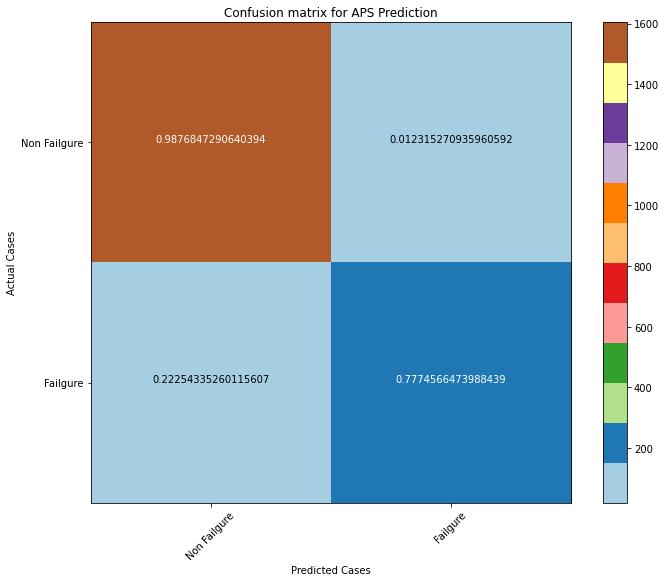

In [100]:
plot_confusion_matrix(val_confusion, classes=['Non Failgure','Failgure'])

In [101]:
roc_score = roc_auc_score(y_test, predict_prob[:, 1])
print("ROC_VALUES", roc_score)

ROC_VALUES 0.9723538184458556


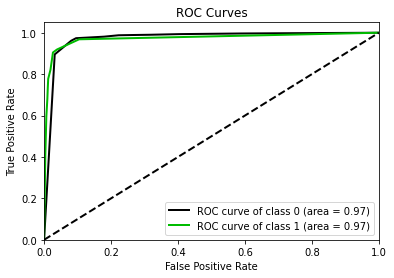

In [102]:
skplt.metrics.plot_roc(y_test,  predict_prob, plot_micro=False, plot_macro=False)
plt.show()

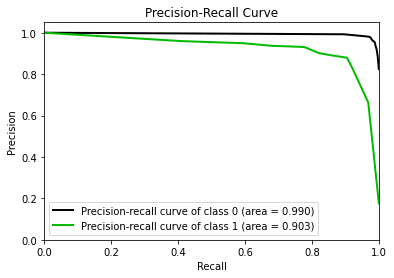

In [103]:
skplt.metrics.plot_precision_recall(y_test, predict_prob, plot_micro=False)
plt.show()

In [112]:
print("Type 1 error (False Positive) = ", val_confusion[0][1])
print("Type 2 error (False Negative) = ", val_confusion[1][0])
print("-"*117)
print("Total cost = ", val_confusion[0][1] * 10 + val_confusion[1][0] * 500)

Type 1 error (False Positive) =  20
Type 2 error (False Negative) =  77
---------------------------------------------------------------------------------------------------------------------
Total cost =  38700


### SVM 

In [153]:
sv_classifier = SVC(probability=True)   

In [155]:
# initializing with different combination of parameters
param_grid = {"kernel": ['rbf', 'sigmoid'],
              "C": [0.1, 0.5, 1.0],
              "random_state": [0, 100, 200, 300]}

# Creating an object of the Grid Search class
grid = GridSearchCV( estimator=sv_classifier, param_grid=param_grid, cv=5, verbose=3)
# finding the best parameters
grid.fit(x_train, y_train)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.1, kernel=rbf, random_state=0 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.937, total=   1.8s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.957, total=   1.8s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.951, total=   1.8s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.944, total=   1.7s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.945, total=   1.8s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.937, total=   1.8s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.957, total=   1.8s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.951, total=   1.8s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.944, total=   1.7s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1.0], 'kernel': ['rbf', 'sigmoid'],
                         'random_state': [0, 100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [167]:
# extracting the best parameters
kernel = grid.best_params_['kernel']
C = grid.best_params_['C']
random_state = grid.best_params_['random_state']

# creating a new model with the best parameters
sv_classifier = SVC(kernel=kernel, C=C, random_state=random_state, probability=True)
# training the mew model, 
sv_classifier.fit(x_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [168]:
### Prediction
predict_svm= sv_classifier.predict(x_test)

In [169]:
confusion_svm = confusion_matrix(y_test, predict_svm)

Normalized confusion matrix


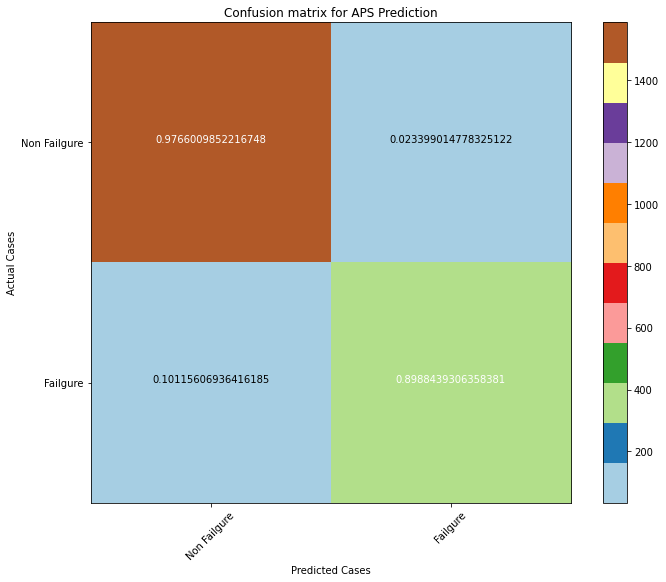

In [170]:
plot_confusion_matrix(confusion_svm, classes=['Non Failgure','Failgure'])

In [171]:
print("Type 1 error (False Positive) = ", confusion_svm[0][1])
print("Type 2 error (False Negative) = ", confusion_svm[1][0])
print("-"*117)
print("Total cost = ", confusion_svm[0][1] * 10 + confusion_svm[1][0] * 500)

Type 1 error (False Positive) =  38
Type 2 error (False Negative) =  35
---------------------------------------------------------------------------------------------------------------------
Total cost =  17880


In [172]:
from sklearn.metrics  import roc_auc_score,accuracy_score
print("Accuracy values"+" "+ str(accuracy_score(y_test, sv_classifier.predict(x_test))))

Accuracy values 0.9629441624365482


In [173]:
predict_prob_svm = sv_classifier.predict_proba(x_test)

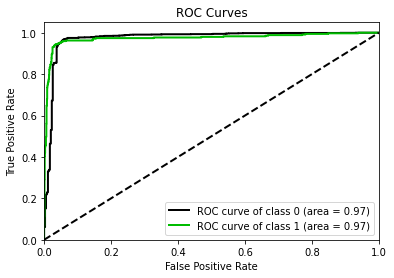

In [174]:
skplt.metrics.plot_roc(y_test,  predict_prob_svm, plot_micro=False, plot_macro=False)
plt.show()

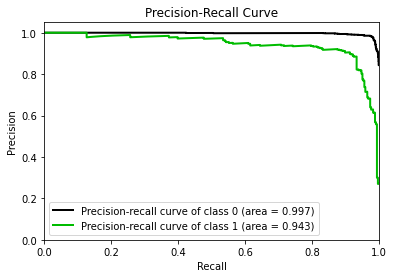

In [192]:
skplt.metrics.plot_precision_recall(y_test, predict_prob_svm, plot_micro=False)
plt.show()

### Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
#model fitting and hyper parameter tuning to find the best parameters
x_cfl=RandomForestClassifier()
#weights = np.linspace(0.05, 0.95, 20)
prams={
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10]}

model=GridSearchCV(x_cfl,param_grid=prams,verbose=10,n_jobs=-1,scoring='f1',cv=5)
model.fit(x_train,y_train)
print("Best estimator is", model.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  9.1min finished


Best estimator is {'max_depth': 10, 'n_estimators': 500}


In [184]:

#model fitting using best parameter
clf = RandomForestClassifier(n_estimators= 2000 , max_depth=10,n_jobs= -1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
con_mat =confusion_matrix (y_test, y_pred)


Normalized confusion matrix


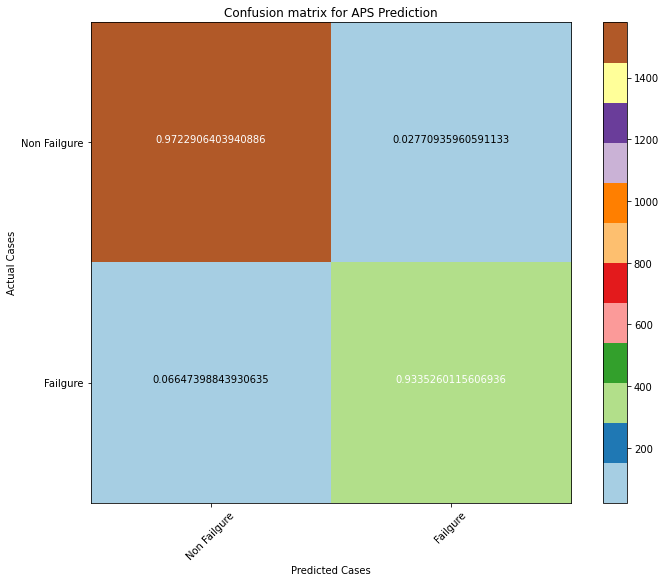

In [185]:
plot_confusion_matrix(con_mat, classes=['Non Failgure','Failgure'])

In [189]:
predict_prob_rf = clf.predict_proba(x_test)

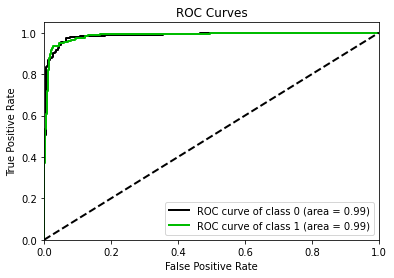

In [190]:
skplt.metrics.plot_roc(y_test,  predict_prob_rf, plot_micro=False, plot_macro=False)
plt.show()

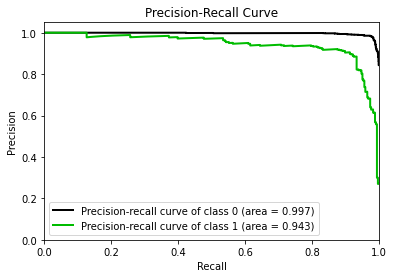

In [191]:
skplt.metrics.plot_precision_recall(y_test, predict_prob_rf, plot_micro=False)
plt.show()

In [193]:

print("-"*117)
print("Type 1 error (False Positive) = ", con_mat[0][1])
print("Type 2 error (False Negative) = ", con_mat[1][0])
print("-"*117)
print("Total cost = ", con_mat[0][1] * 10 + con_mat[1][0] * 500)
print("-"*117)

---------------------------------------------------------------------------------------------------------------------
Type 1 error (False Positive) =  45
Type 2 error (False Negative) =  23
---------------------------------------------------------------------------------------------------------------------
Total cost =  11950
---------------------------------------------------------------------------------------------------------------------


In [2]:
from prettytable import PrettyTable

In [3]:

table1 = PrettyTable()
print("Table showing the total cost for different models")
table1.field_names = (['Model', 'FN', 'FP', 'Total Cost'])
table1.add_row(['KNN', 77,20,38700])
table1.add_row(['SVM', 35,38,17880])
table1.add_row(['Random Forest', 23,45,11950])
print(table1)

Table showing the total cost for different models
+---------------+----+----+------------+
|     Model     | FN | FP | Total Cost |
+---------------+----+----+------------+
|      KNN      | 77 | 20 |   38700    |
|      SVM      | 35 | 38 |   17880    |
| Random Forest | 23 | 45 |   11950    |
+---------------+----+----+------------+


### **Discussion**

Among KNN, SVM and Random Forest, The Random Forest model provide the least cost for prediction. It means It has a higher F1 score and AUC values. Since the total cost is equal to 500 x FN and 100 x FP, to have a minimal cost it is required to have a lower FN. This can be achieved by having a proper precision-recall tradeoff